In [31]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import sys
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import sklearn.metrics

In [32]:

mnist = loadmat("mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]

In [33]:
mnist_df=pd.DataFrame(mnist_data)
mnist_df["y"]=mnist_label
mnist_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [34]:
# x=mnist_df.iloc[:,:-1]
# x

In [35]:
df_new=pd.DataFrame()
for i in range(0,10):
    temp=mnist_df[mnist_df['y']==i].iloc[0:2000]
    df_new=df_new.append(temp,ignore_index=True)
df_new

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


In [36]:
x=df_new.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y=df_new['y']
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
19995    9.0
19996    9.0
19997    9.0
19998    9.0
19999    9.0
Name: y, Length: 20000, dtype: float64

In [38]:
mnist_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [39]:
x=x.apply(lambda x:((x)/128.0).astype(np.int))

In [40]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.0,20000.0,20000.0,20000.0,20000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000600,0.000300,0.000350,0.000200,0.0001,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024488,0.017318,0.018705,0.014141,0.0100,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.0000,0.0,0.0,0.0,0.0,0.0


0.0


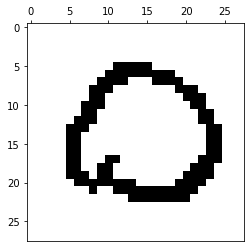

In [41]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(np.array(x.iloc[100]).reshape(28,28), cmap=plt.cm.Greys)
print(y.iloc[500])
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
plt.show()

In [42]:
y.value_counts()

0.0    2000
1.0    2000
2.0    2000
3.0    2000
4.0    2000
5.0    2000
6.0    2000
7.0    2000
8.0    2000
9.0    2000
Name: y, dtype: int64

In [43]:
def Estep(X,mu,pi):
    N = X.shape[0]
    K = mu.shape[0]
    gamma = np.zeros((N, K),dtype=np.float128)
    
    for i in range(N):
        sum=np.float128(0)
        for k in range(K):
            gamma[i,k] = np.prod((mu[k]**X[i])*((1-mu[k])**(1-X[i])),dtype=np.float128)
            # sum=sum+gamma[i,k]
        # print(sum)
        # gamma[i]=gamma[i]/sum
    gamma=gamma*pi
    # print(gamma)
    gamma = (gamma)/np.sum(gamma, axis=1, keepdims=True,dtype=np.float128)
    # print(gamma)
    return gamma
    

In [44]:
def Mstep(X,gamma):
    N=X.shape[0]
    K=gamma.shape[1]
    D=X.shape[1]
    pi = np.sum(gamma, axis=0,dtype=np.float128)/N
    mu = np.empty((K, D),dtype=np.float128)
    Nk = np.sum(gamma, axis=0,dtype=np.float128)

    for k in range(K):
        mu[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
         
    # for k in range(K):
    #         mu[k] = np.sum(gamma[:,k][:,np.newaxis]*X,axis=0) 
    #         mu[k] = mu[k]/Nk[k]   
   
    return mu,pi
   

In [45]:
def logLikelihood(X,gamma,mu,pi):
    N=X.shape[0]
    K=gamma.shape[1]
    llh=0
    for i in range(N):
        sum = 0
        for k in range(K):
            temp = ((mu[k]**X[i])*((1-mu[k])**(1-X[i])))
            temp = np.log(temp,dtype=np.float128)
            sum += gamma[i, k]*(np.log(pi[k],dtype=np.float128)+np.sum(temp))
        llh =llh+ sum
        
    return llh

In [46]:
def EM(df,K,delta=0.000000000001):
    X=df.to_numpy()
    N, D = X.shape
    # mu = X[np.random.choice(N, size=K, replace=True), :]
    # mu = np.full((K, D), 1.0/K,dtype=np.float128)
    mu = np.zeros((K,D))
    for i in range(0,K):
        mu_class_k = np.random.uniform(low = 0.25, high = 0.75, size = 784)
        mu_class_k = mu_class_k * 1.0/mu_class_k.sum()
        mu[i]=mu_class_k
    
    # pi = np.ones(shape=(K), dtype=np.float128)/K
    pi=np.random.uniform(.25,.75,K)
    tot=np.sum(pi)
    pi=pi/tot
    # pi=np.array([0.2,0.5,0.3])
    
    cur_llh = np.float(1e9)
    prev_llh=0.0
    iter=0
    while(abs(cur_llh-prev_llh)>delta):
        gamma=Estep(X,mu,pi)
        mu,pi=Mstep(X,gamma)
        iter=iter+1
        prev_llh=cur_llh
        cur_llh=logLikelihood(X,gamma,mu,pi)
        
    label = np.argmax(gamma,axis=1)
    print(iter)
    return mu,pi,label,gamma





In [47]:
K=10
mu,pi,label,gamma=EM(x,K)

<ipython-input-45-3e6cd3da3d7c>:9: RuntimeWarning: divide by zero encountered in log
  temp = np.log(temp,dtype=np.float128)
<ipython-input-45-3e6cd3da3d7c>:10: RuntimeWarning: invalid value encountered in longdouble_scalars
  sum += gamma[i, k]*(np.log(pi[k],dtype=np.float128)+np.sum(temp))


4


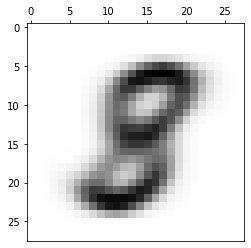

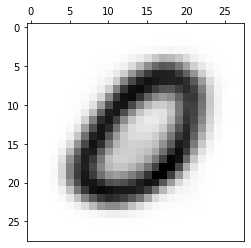

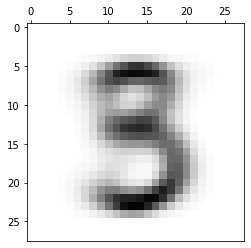

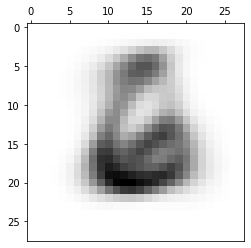

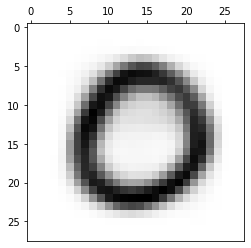

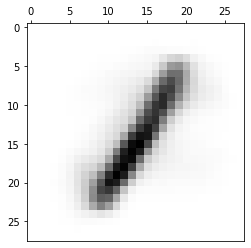

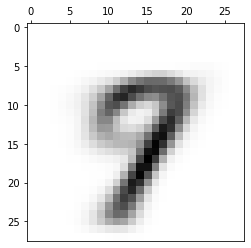

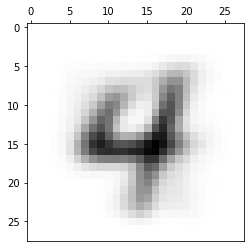

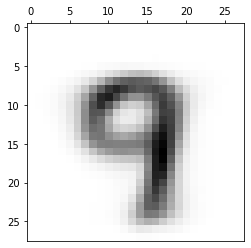

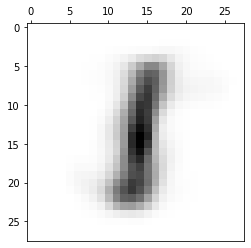

In [49]:
for i in range(0,K):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(mu[i].reshape(28,28), cmap=plt.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
plt.show()

In [58]:
dict={
    0:8,
    1:0,
    2:3,
    3:6,
    4:0,
    5:1,
    6:7,
    7:4,
    8:9,
    9:1
}


In [59]:
y_pred=np.zeros(gamma.shape[0])
for i in range(0,gamma.shape[0]):
    y_pred[i]=dict[label[i]]

In [60]:
acc= sklearn.metrics.accuracy_score(y,y_pred)
acc

0.5191

In [62]:
Misclassified_points=(1-acc)*20000
Misclassified_points

9618.0

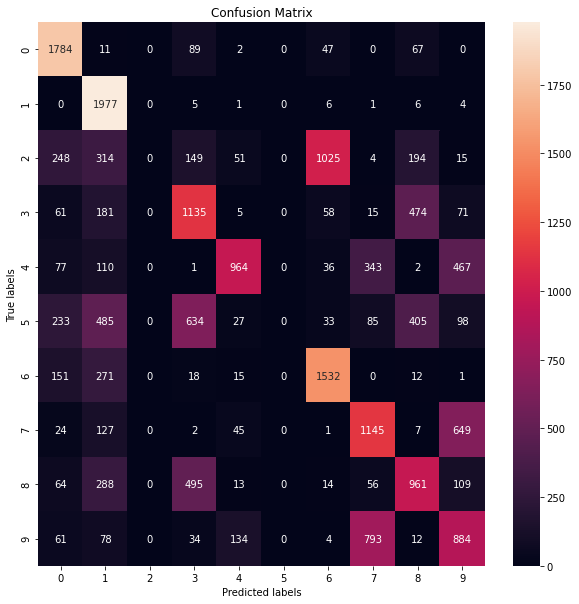

In [61]:
confusionMat=sklearn.metrics.confusion_matrix(y,y_pred)
confusionMat
ax= plt.subplots(figsize=(10,10))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 